Here is a description of each of the variables contained within the dataset.

* Enough = Do you think that you get enough sleep?
* Hours = On average, how many hours of sleep do you get on a weeknight?
* PhoneReach = Do you sleep with your phone within arms reach?
* PhoneTime = Do you use your phone within 30 minutes of falling asleep?
* Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
* Breakfast = Do you typically eat breakfast?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations
import plotly.express as px

In [2]:
sleep = pd.read_csv("../input/sleepstudypilot/SleepStudyData.csv")
sleep

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes
...,...,...,...,...,...,...
99,No,7.0,Yes,Yes,2,Yes
100,No,7.0,No,Yes,3,Yes
101,Yes,8.0,Yes,Yes,3,Yes
102,Yes,7.0,Yes,Yes,2,Yes


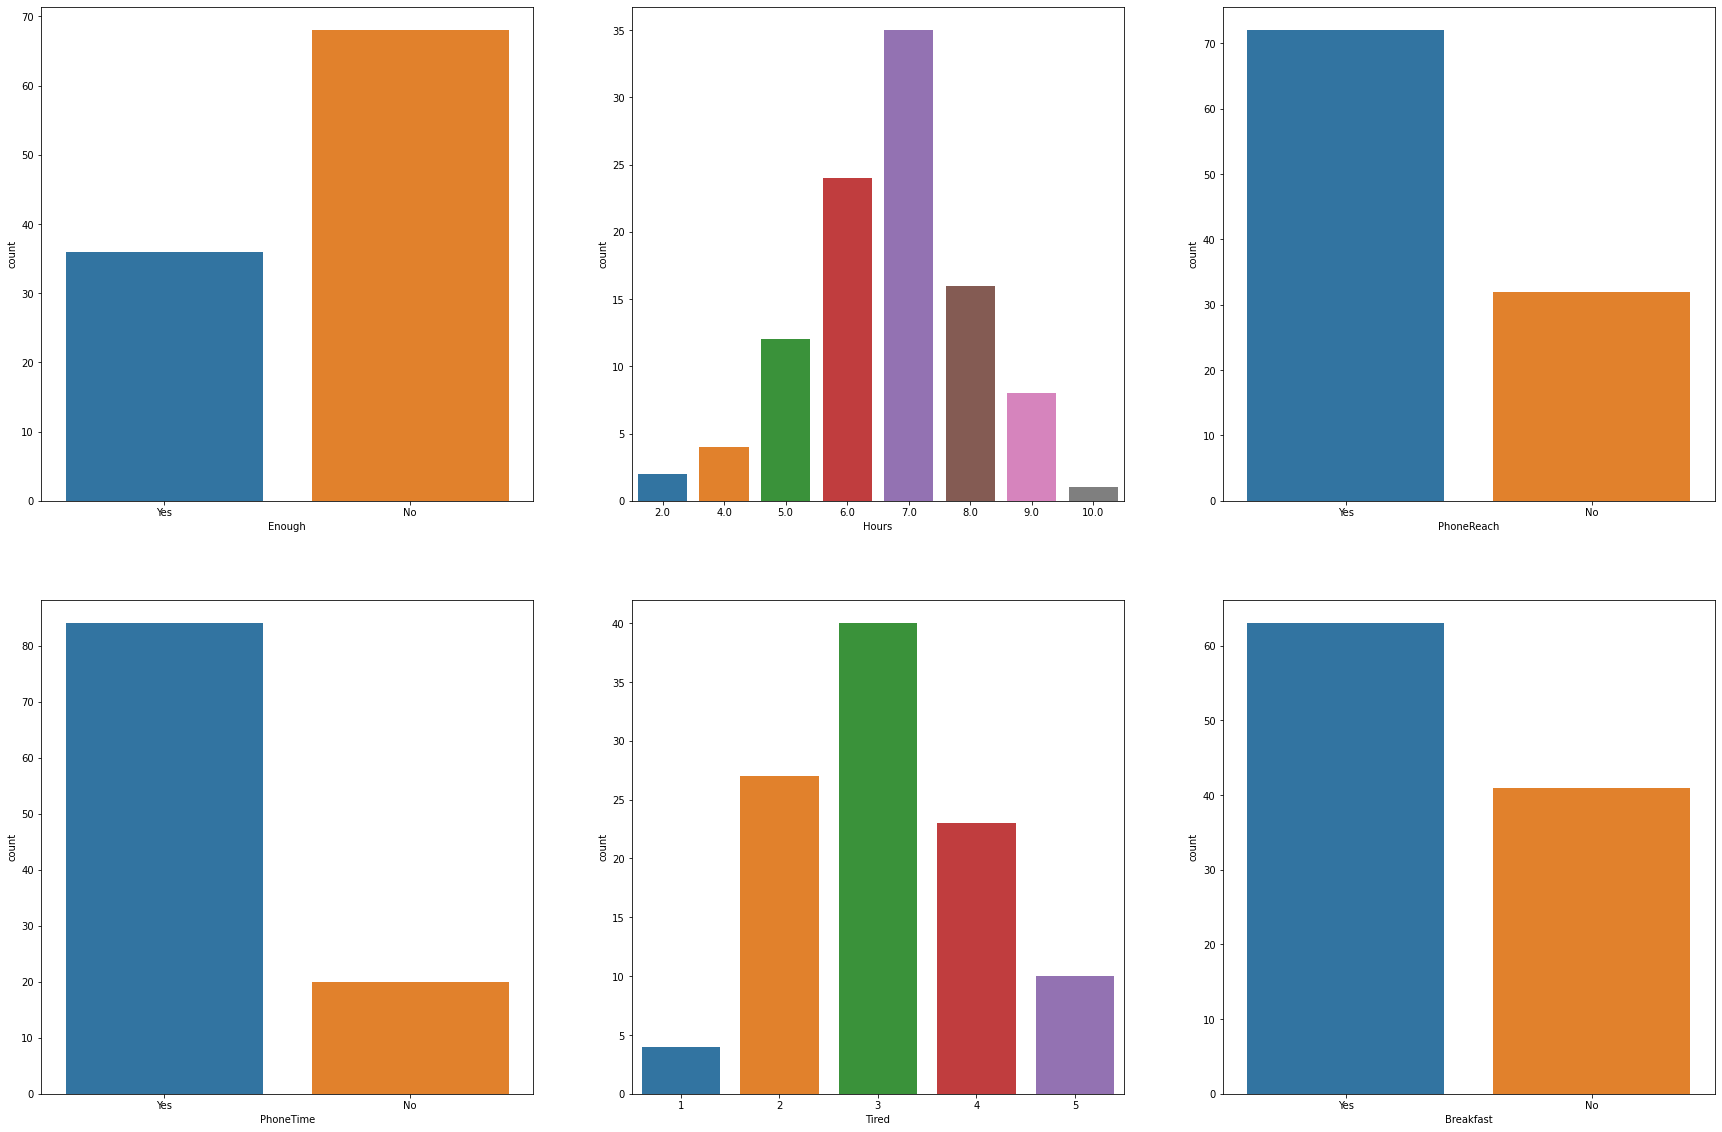

In [3]:
plt.figure(figsize=(30,20))
for i, c in enumerate(sleep.columns):
    plt.subplot(2,3,i+1)
    sns.countplot(sleep[c])
plt.show()    

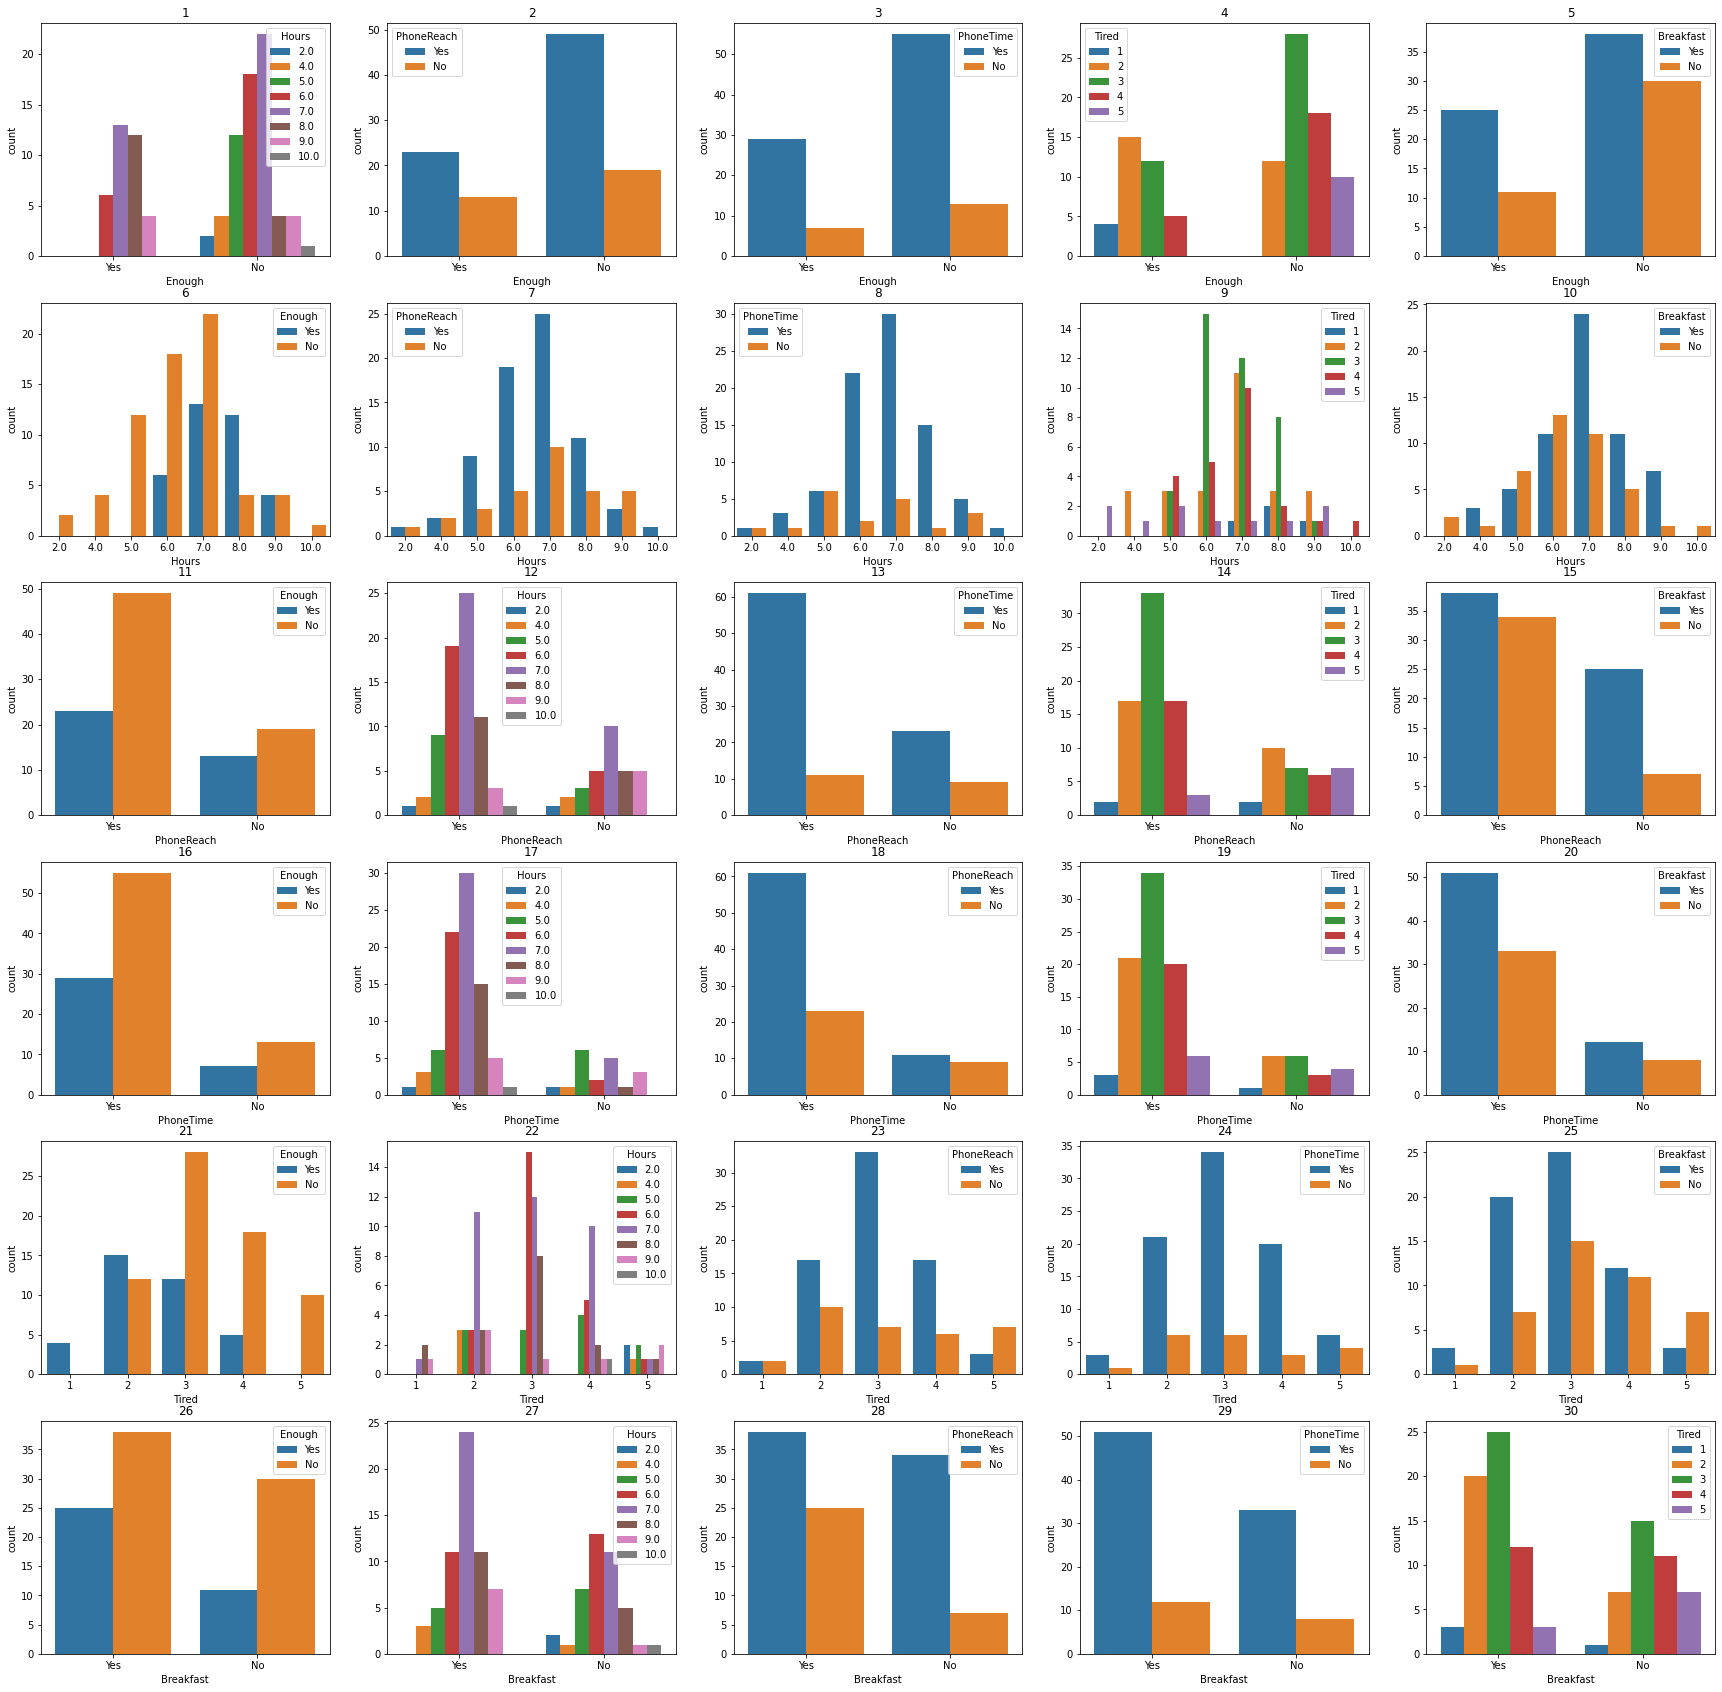

In [4]:
ps = permutations(sleep.columns,2)
plt.figure(figsize=(30,30))
for i, c in enumerate(ps):
    plt.subplot(6,5,i+1)
    plt.title(i+1)
    sns.countplot(sleep[c[0]], hue=sleep[c[1]])
plt.show()

## PhoneReach and PhoneTime

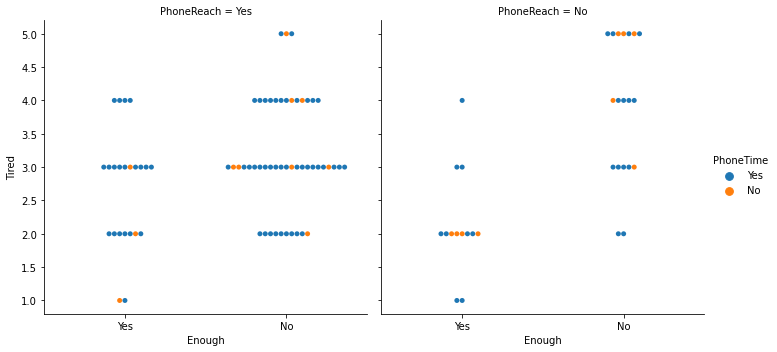

In [5]:
sns.catplot(x="Enough", y="Tired",
            hue="PhoneTime", col="PhoneReach",
            data=sleep, kind="swarm")
plt.show()

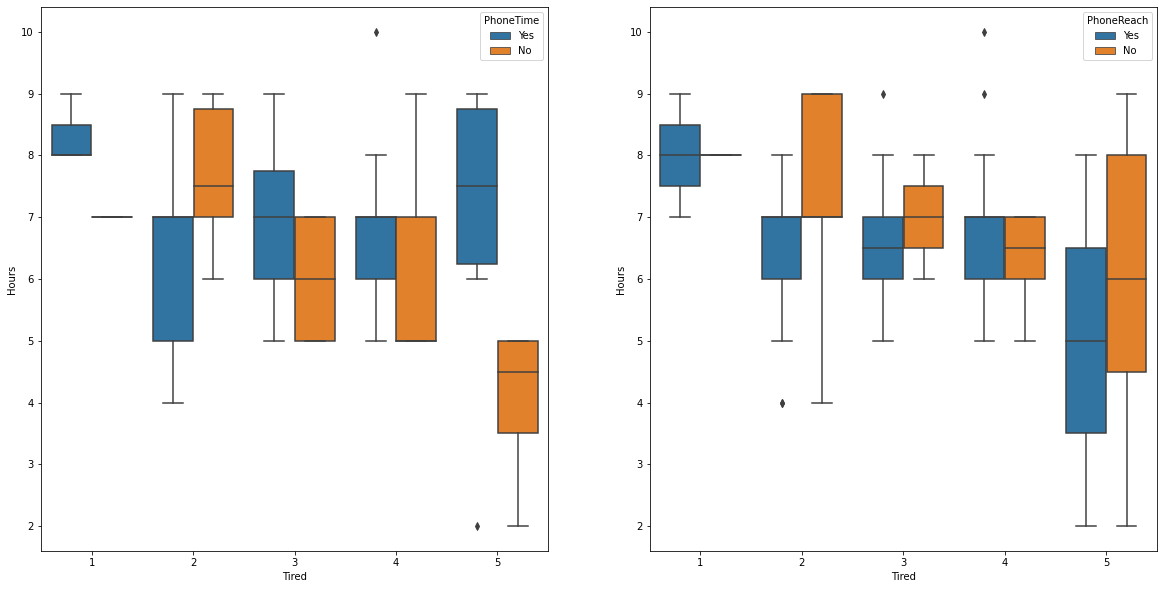

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x="Tired",y="Hours",hue="PhoneTime",data=sleep)
plt.subplot(1,2,2)
sns.boxplot(x="Tired",y="Hours",hue="PhoneReach",data=sleep)
plt.show()

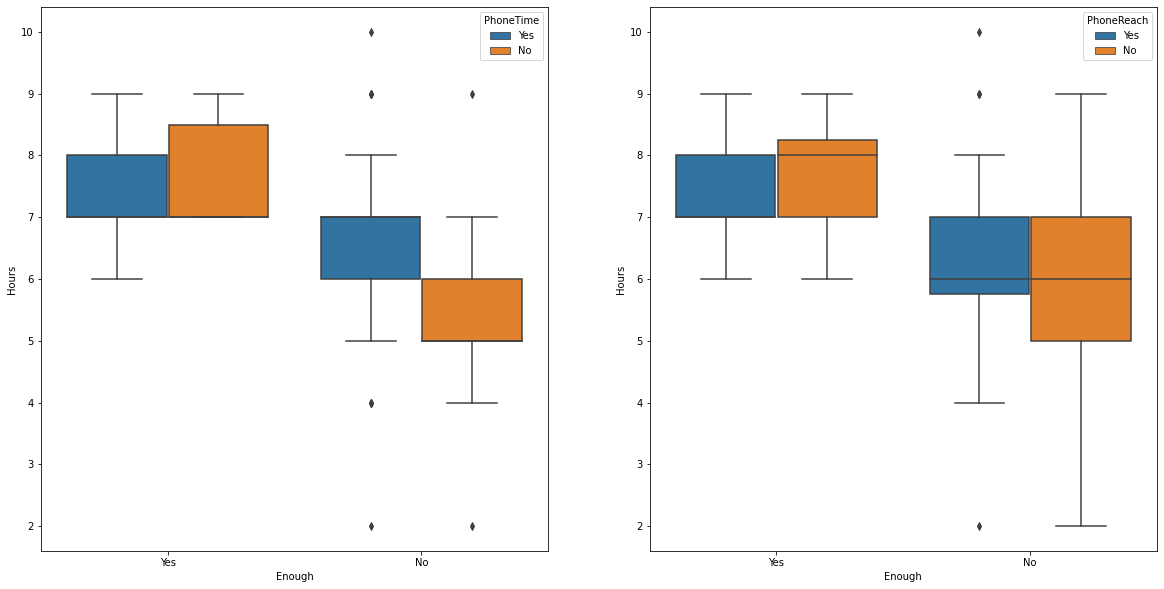

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x="Enough",y="Hours",hue="PhoneTime",data=sleep)
plt.subplot(1,2,2)
sns.boxplot(x="Enough",y="Hours",hue="PhoneReach",data=sleep)
plt.show()

#### I can't find any correlations between effects of using phone before sleep or have it within arms reach.
#### The reason why we can't see any correlations is we don't have data about when the sleeping was happening(it is important to know if they get enough of NREM sleep).

## Breakfast and Hours

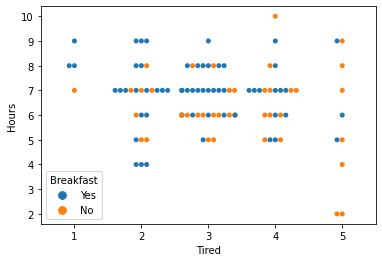

In [8]:
sns.swarmplot(x="Tired",y="Hours",data=sleep,hue='Breakfast')
plt.show()

In [9]:
fig = px.bar(sleep.groupby("Breakfast")["Tired"].mean().reset_index(), x='Breakfast', y='Tired')
fig.show()

### Now we can see that breakfast eaters tend to be less tired than those who don’t have breakfast in the morning.

In [10]:
fig = px.bar(sleep.groupby("Tired")["Hours"].mean().reset_index(), x='Tired', y='Hours', color="Tired", title="the mean of hours slept per tiredness")
fig.show()

### and here we can see that on average those who sleep for 8 hours are not tired at all!

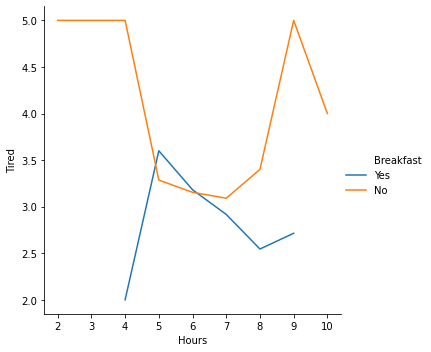

In [11]:
sns.relplot(x="Hours", y="Tired", ci=None, kind="line", hue="Breakfast", data=sleep)
plt.show()

### In conclusion, it is clear that having 8 hours of sleep and eating breakfast will let us feel more energized and active throughout the day.